# HW2 – Machine Learning in Healthcare 336546 

T1D is a chronic condition resulting from a lack of insulin in the body. The disease typically
presents in early childhood or adolescence. Up to 0.33% of the global population suffers from
T1D, making it a world-wide and wide-spread issue. There is no cure and the current treatment
is to control blood glucose levels through glucose monitoring, insulin injections, diet, and lifestyle
modifications to prevent complications.

## **Theory Questions (28%)**

### **Q1:**

#### To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

### **A1:**

'Model performance' is the evaluation metric which is more important to us. The reason is that accuracy can be misleading. For example, we can consider a classification algorithm with accuracy of 90% to be highly accurate algorithm. However, if our data were imbalanced with a ratio of 90%-10%, even a naive classifier would achieve that performance (In our case the ratio between the labels is 61%-39% which mean we will not consider it as a highly accurate algorithm). In the other side, model performance provides better insights when classes are skewed. PPV and NPV are performance statistics that in case of imbalance of the classes into account which might be a good thing if our population sample is characteristic of our population of interest

### **Q1:**

#### T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

### **A2:**

Pros of choosing only 2 features (BP and BMI):

    •	Simple model – shorter times to running the model, easier to debug and understand.
    •	the more dimensions the training set has, the greater the risk of overfitting the model.
    •	It decreases the number of irrelevant or redundant features and that way it decreases the misleading data.

Cons of choosing only 2 features (BP and BMI):

    •	Accuracy - The less information we have the less accurate conclusions we can get.
    •	Missing information – to little information can lead to underfitting model.

Pros of choosing all the available features:

    •	Accuracy - The more information we have the more accurate conclusions we can get.
    •	Some features is not always necessary but may become necessary for an optimal subset at certain conditions.

Cons of choosing all the available features:

    •	Visualization- too many features may obstruct interpretability.
    •	Curse of dimensionality- as the number of features increases, we need exponentially more examples in order to ensure our model will generalize well.
    •	computing time, cost for collecting many features.


### **Q3:**

#### A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

### **A3:**

For a large number of features and samples SVM is preferred than LR.                                          For a nonlinearly separatable features, which it sound like in this case (because they are not distinguish by the human eye) we will preferred a nonlinear, relatively complex model
Which will transform the data from the feature domain to a different domain which in it the data will be separatable. So basically we will choose the model based on the data size and the classes geometry and shape.


### **Q4:**

#### What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

### **A4:**

LR is a probabilistic model which its output is the probability to be in one of two or more classes, LR is linear and it is a relatively simple model. 
SVM is a model which maximize the margins resulted from a separating hyperplane which separate between 2 classes. SVM could be either linear or nonlinear.
SVM is more suitable for problem with many features than LR. SVM is also more complex model and is more sensitive to overfitting. Usually, will start with LR and if its performance is not enough will use SVM, because SVM is usually more accurate but more complex.

We have the hyper-parameters  λ,c,d. 
λ lambda- Regularization parameter. 
c it is the penalization for miss classification.                                                                                      
d is the model dimension.

λ is responsible for the regulazation of LR, the higher it is the model is less likely to be overfitted. 

C in linear SVM control how much misclassification the model can tolerate. For large values of C, the optimization will choose a smaller margin.


## **Coding Assignment (72%)**

**1) Load the data. Explain any preprocessing. (5%)**

In [11]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import random
from clean_data2 import rm_nan as rm
from clean_data2 import nan2num_samp
from clean_data2 import sum_stat
from clean_data2 import norm_standard
from sklearn.model_selection import train_test_split
from clean_data2 import compare_test_train_stas
from clean_data2 import plot_feature_diagnosis
from clean_data2 import cv_kfold
from clean_data2 import pred_log
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from clean_data2 import calculate
from sklearn.ensemble import RandomForestClassifier
from clean_data2 import important_features

if __name__ == '__main__':
    file = Path.cwd().joinpath('HW2_data.csv')  # concatenates messed_CTG.xls to the current folder that should
    # be the extracted zip folder
    T1D_dataset = pd.read_csv(file).iloc[:, :]
    T1D_features = T1D_dataset[['Age', 'Gender', 'Increased Urination', 'Increased Thirst', 'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
                                'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity', 'Family History']]
    Diagnosis = T1D_dataset[['Diagnosis']]

    random.seed(10)

pre-preprocessing:
    deleting nan and making the data binary:

In [12]:
    c_t1d = rm(T1D_features, ['Age', 'Family History'])

In [13]:
    clean_t1d = nan2num_samp(c_t1d)

finding the 5 summry statistics:

In [14]:
    d_summary = sum_stat(clean_t1d, 'Age')

Normalization of the only non-binary feature-Age (between 0 to 1):

In [15]:
    norm_t1d = norm_standard(clean_t1d, selected_feat='Age', mode='MinMax', flag=False)

**2) Perform a test-train split of 20% test. (5%)**

stratify mean that in test and the training gonna be the same percent of samples from each labal- Negative/Posiive. that way we ensure they have the same distribution.
    because we split the normelizes data, fron now on we dont need to scale the data (because we are using scaled data already:

In [16]:
    X_train, X_test, y_train, y_test = train_test_split(norm_t1d, np.ravel(Diagnosis), test_size=0.2, random_state=336546, stratify=np.ravel(Diagnosis))

**3) Provide a detailed visualization and exploration of the data. (10%)
You should at least include:**

**a. An analysis to show that the distribution of the features is similar between test and**
**train. See table 1 below.**

**i. What issues could an imbalance of features between train and test cause?**

**ii. How could you solve the issue?**

**b. Plots to show the relationship between feature and label. See Figure 1 below.**

**c. Additional plots that make sense given the mostly binary nature of this dataset.**

**d. State any insights you have**

**i. Was there anything unexpected**?

**ii. Are there any features that you feel will be particularly important to your**
**model? Explain why.**

3a:
i. When the examples unequally distributed between the test and train sets the prediction could be biased. For example, the training received more examples of healthy patients so more sick patients remained for the test, this will cause our prediction to be incorrect (the fit of the model will not be good because the data in it did not represent the population well, the splitting of the samples should be under control - so that the sets will be even). 

ii. With the option of stratify when we are splitting the data to train and test sets with the function train_test_split from sklearn.model_selection. That option ensure that the test set and the training set going to be the same percent of samples from each label- Negative/Positive. that way we ensure they have the same distribution and we cancel differences between the 2 sets of samples (that can influence our capability of correct prediction).


In [17]:
    compare_test_train_stas(X_test, X_train, 'Age')

,positive feature,test%,train%,delta%
0,Gender,35.4,36.5,1.1
1,Increased Urination,47.8,48.5,0.7
2,Increased Thirst,41.6,45.4,3.8
3,Sudden Weight Loss,40.7,41.6,0.9
4,Weakness,53.1,58.2,5.1
5,Increased Hunger,44.2,44.2,0.0
6,Genital Thrush,22.1,22.1,0.0
7,Visual Blurring,46.0,44.7,-1.3
8,Itching,43.4,49.8,6.4
9,Irritability,21.2,24.1,2.9


we are using the non_normalized data in order to get correct plot (normalization wont mettar for the plot):

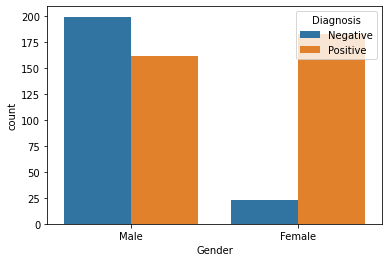

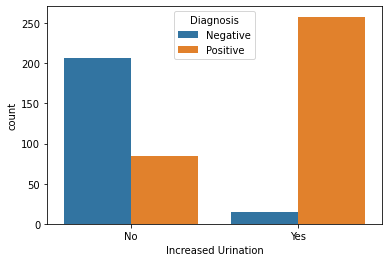

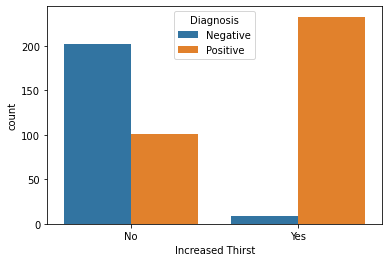

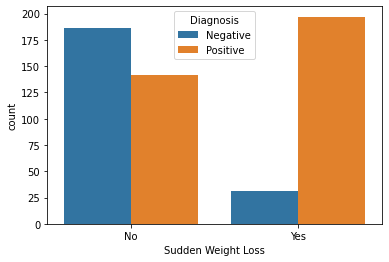

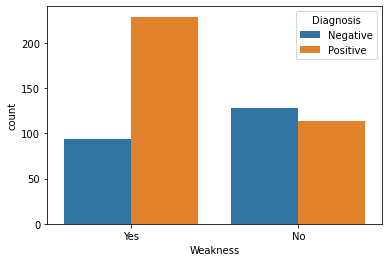

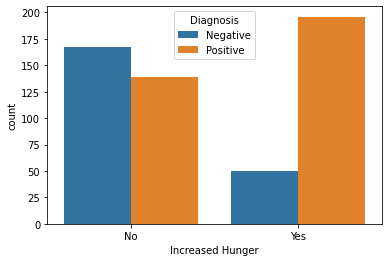

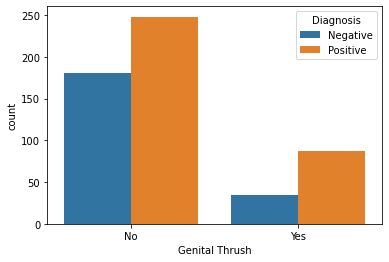

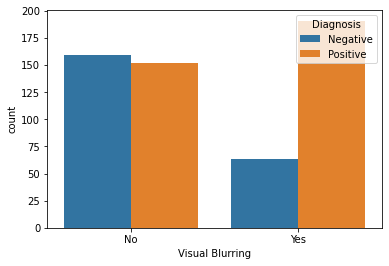

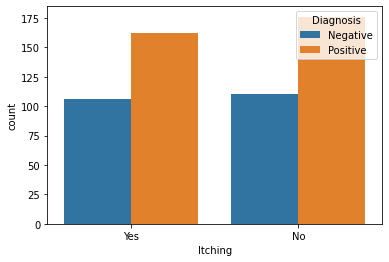

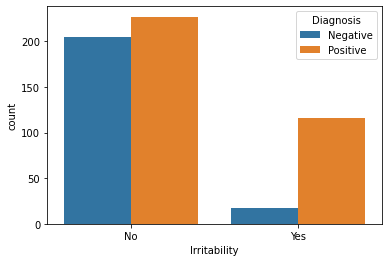

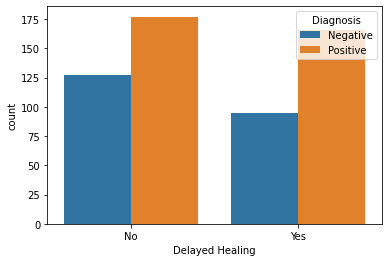

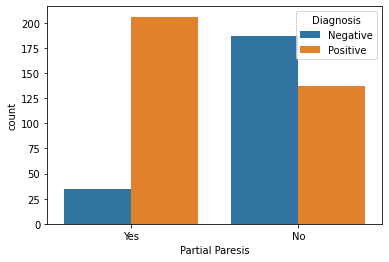

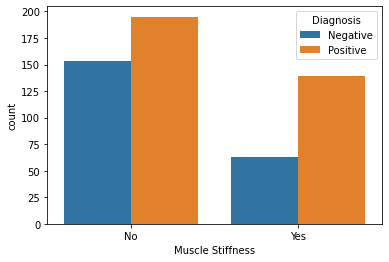

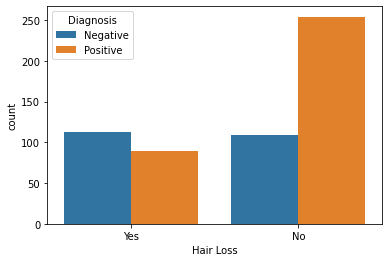

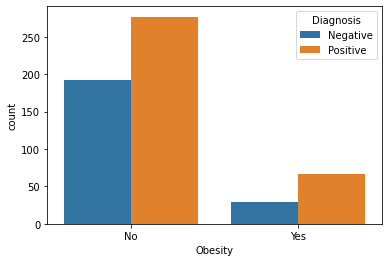

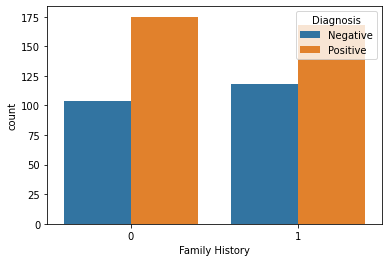

In [18]:
    plot_feature_diagnosis(T1D_dataset, Diagnosis, ['Age', 'Diagnosis'])

additional plot: checking the relation between the two labels (additional plots us required):

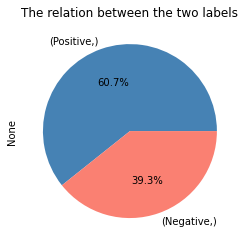

In [29]:
    X = norm_t1d.iloc[:, 1:]
    Y = Diagnosis.iloc[:, :]
    Y.value_counts().plot(kind="pie", colors=['steelblue', 'salmon'], autopct='%1.1f%%')
    plt.title("The relation between the two labels")
    plt.show()


additional plot: plotting the distribution of the age, by diagnosis (checking if thare is some connection between age and doagnosis. the answer is no as we can see in the histogram)

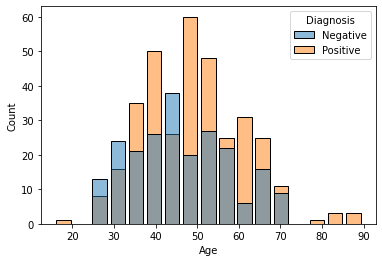

In [31]:
    sns.histplot(x=T1D_dataset['Age'], data=T1D_dataset, hue="Diagnosis", shrink=.8)
    plt.show()

3d:

i. Yes. There was unexpected result in the gender feature- we would expect that the negative and positive labels would be spread equally or close between male and female. But, us we can see in the plot there is almost any negative female to T1D. We can assume that this surprising result is due to Unbalanced data (the nurse asked more sick women than healthy ones).

ii. Yes. The features: increased urination and increased thirst. As we can see from the graph there is a strong correlation between excessive urination and diagnosis as a sick patient, in addition there is a strong correlation between Increased thirst and diagnosis as a sick patient. As we understand, the 2 features are related (increased thirset cause more drinking and as a consequence we urinate a lot) so it is not surprising that if one of them particularly important, then the other one too.


**4) Encode all your data as one hot vectors. (5%)**

we are writing this for the record, but we alredy made our data to hot vector, without diagnosis.
(later, when w'll need it we will make the diagnosis to hot vector too).

In [20]:
    one_hot_vector = rm(T1D_dataset, ['Age', 'Family History'])

**5) Choose, build and optimize Machine Learning Models: (20%)**

   **a. Use 5k cross fold validation and tune the models to achieve the highest test AUC:**

   **i. Train one or more linear model on your training set**

   **ii. Train one or more non-linear models on your training set**

   **b. Report the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS,
ACC).**

   **c. What performs best on this dataset? Linear or non-linear models?**

In [22]:
    C = [0.1, 1, 3, 10, 25, 100]  # a list of  6 different values of regularization parameters to examine their effects
    K = 5  # number of folds
    mode = 'MinMax'  # mode of norm_standard function

    y_train_df = pd.DataFrame(y_train)
    y_train_int = y_train_df.replace({"Positive": 1.0, "Negative": 0.0})
    validation_dict = cv_kfold(X_train, np.ravel(y_train_int), C=C, penalty=['l1', 'l2'], K=K, mode=mode) #np.ravel return a contiguous flattened array
    y_pred_non = pred_log(SVC(C=validation_dict["non_linear"]["C"], kernel='poly', max_iter=10000), X_train, np.ravel(y_train_int), X_test)
    y_pred_lin = pred_log(LogisticRegression(solver='saga', penalty=validation_dict["linear"]["penalty"], C=validation_dict["linear"]["C"], max_iter=10000, multi_class='ovr'), X_train,np.ravel(y_train_int), X_test)

    y_test_df = pd.DataFrame(y_test)
    y_test_int = y_test_df.replace({"Positive": 1.0, "Negative": 0.0})

    calculate(np.ravel(y_test_int), y_pred_non, "svm - non linear model", validation_dict["non_linear"]["mu"])
    calculate(np.ravel(y_test_int), y_pred_lin, "logistic regression - linear model", validation_dict["linear"]["mu"])


the evaluation metrics of the train and test sets of the svm - non linear model is: AUC= 0.9420289855072463 F1= 0.9384615384615386 ACC= 0.9292035398230089 LOSS: 1.603375187465818
the evaluation metrics of the train and test sets of the logistic regression - linear model is: AUC= 0.9224308300395258 F1= 0.9333333333333332 ACC= 0.9203539823008849 LOSS: 2.6003504705474554


5c:
The nonlinear model (SVM) performs best on this dataset. We infer it from the fact that there is lower LOSS in the nonlinear model than the linear model. In addition, the AUC in the nonlinear-SVM model closer to 1 (bigger, after all the maximum AUC is 1) than the LR model. The accuracy and F1 are bigger in the nonlinear model too. In conclusion, all parameters show that the nonlinear model is more suitable.


**6) Feature Selection (10%)**

**a. As seen previously, a Random Forest Network can be used to explore feature**
**importance. Train a Random Forest on your data.**

**i. What are the 2 most important features according to the random forest.**

**ii. Does this match up exactly with the feature exploration you did?**

In [24]:
    clf = RandomForestClassifier(max_depth=2, random_state=10)
    clf.fit(X_train, y_train)
    print(clf.feature_importances_)

    feat1,feat2 = important_features(clf.feature_importances_,['Age', 'Gender', 'Increased Urination', 'Increased Thirst', 'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
                                'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity', 'Family History'])
    print("The 2 most important features according to the random forest are:", feat1, "and", feat2)

[1.14047680e-02 1.27041782e-01 2.77368103e-01 2.72082542e-01
 1.00941379e-01 5.81564480e-03 2.21768021e-02 3.54840075e-03
 8.45521541e-03 1.84776443e-03 4.00339568e-02 2.30224319e-04
 8.80461587e-02 6.86373731e-04 3.63658960e-02 3.88723144e-03
 6.77573672e-05]
The 2 most important features according to the random forest are: Increased Urination and Increased Thirst


6a:

i: The 2 most important features according to the random forest are: Increased Thirst and Increased Urination.

ii: yes, s this match up exactly with the feature exploration we did in question 3 (we infer the same 2 features are particularly important from the plots showing the frequency of the features according to Diagnosis). 


**7)Data Separability Visualization:(20%)**

**a. Perform dimensionality reduction on the dataset so that you can plot your data in a**
**2d plot (show samples with positive and negative labels in different colors).**

**b. How separable is your data when reduced to just two features?**

**c. Train the same models above on the dimensionality-reduced training set.**

**d. Train the same models on the best two features from section 6.**

**e. What performs better? 2 features of the reduced dimensionality.**

we couldn't run PCA!- Moran saw it too..therefore we answered only on d and e

In [28]:
    hot_vec_diagnosis = Diagnosis.replace({"Positive": 1.0, "Negative": 0.0})
    #D_redaction(data=X_train, num_component =2, labels=hot_vec_diagnosis) #doesnt work from some reason

    #finding the best hyper-parameter c and penalty
    X_train_2feat = X_train[['Increased Urination', 'Increased Thirst']]
    X_test_2feat = X_test[['Increased Urination', 'Increased Thirst']]
    C = [0.1, 1, 3, 10, 25, 100]  # a list of  6 different values of regularization parameters to examine their effects
    K = 5  # number of folds
    mode = 'MinMax'  # mode of norm_standard function
    validation_dict = cv_kfold(X_train_2feat, np.ravel(y_train_int), C=C, penalty=['l1', 'l2'], K=K, mode=mode)

    y_pred_non = pred_log(SVC(C=validation_dict["non_linear"]["C"], kernel='poly', max_iter=10000), X_train_2feat, np.ravel(y_train_int), X_test_2feat)
    y_pred_lin = pred_log(LogisticRegression(solver='saga', penalty=validation_dict["linear"]["penalty"], C=validation_dict["linear"]["C"], max_iter=10000, multi_class='ovr'), X_train_2feat, np.ravel(y_train_int), X_test_2feat)



Because we had a problem with the PCA function (as we understand that binary data function doesn’t fit the function), we cannot say for sure which of the 2 options is better because we have no results to illustrate. Although, our guess is that downsizing by PCA will be better because the more dimensions the training set has, the greater the risk of overfitting the model. PCA tries to find a linear surface (1D line, a plane or a hyper plane) where the data can be projected to and still maintain as much information. Of course you can lose some of the information, but deleting all the features except 2 without any consideration for them will lose more information in our opinion.

# **THE END**